In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/spam /input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/spam_ham_dataset.csv.zip')

In [ ]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [ ]:
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [ ]:
df.tail(10)

,Unnamed: 0,label,text,label_num
5161,4979,spam,Subject: penny stocks are about timing\r\nnoma...,1
5162,4162,spam,Subject: anomaly boys from 3881\r\nuosda apapr...,1
5163,1428,ham,Subject: re : meter # : 1266 ; august 2000 / a...,0
5164,4365,spam,Subject: slutty milf wants to meet you\r\ntake...,1
5165,2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [ ]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


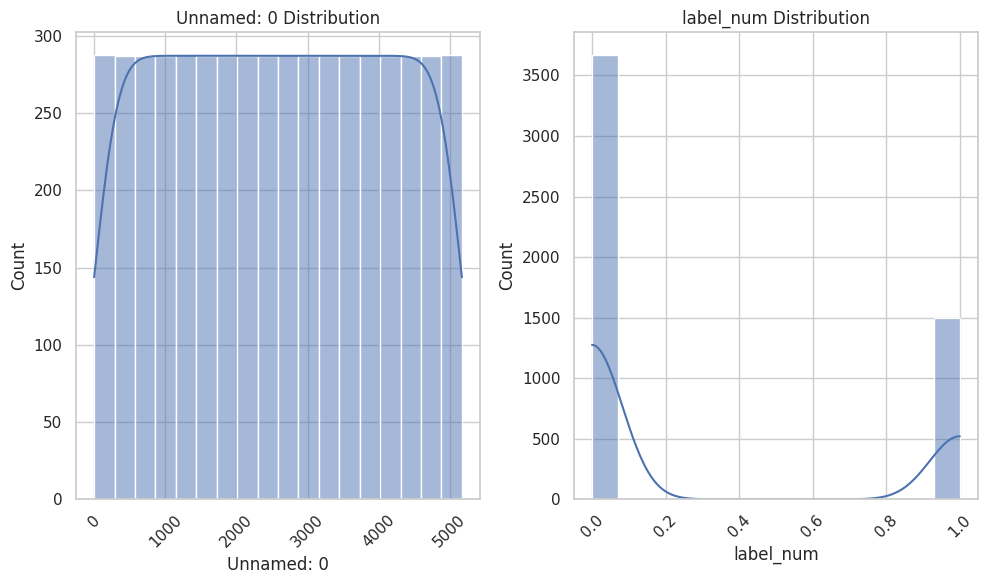

In [ ]:
sns.set(style="whitegrid")
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
num_cols = len(numerical_columns)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20, 6 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


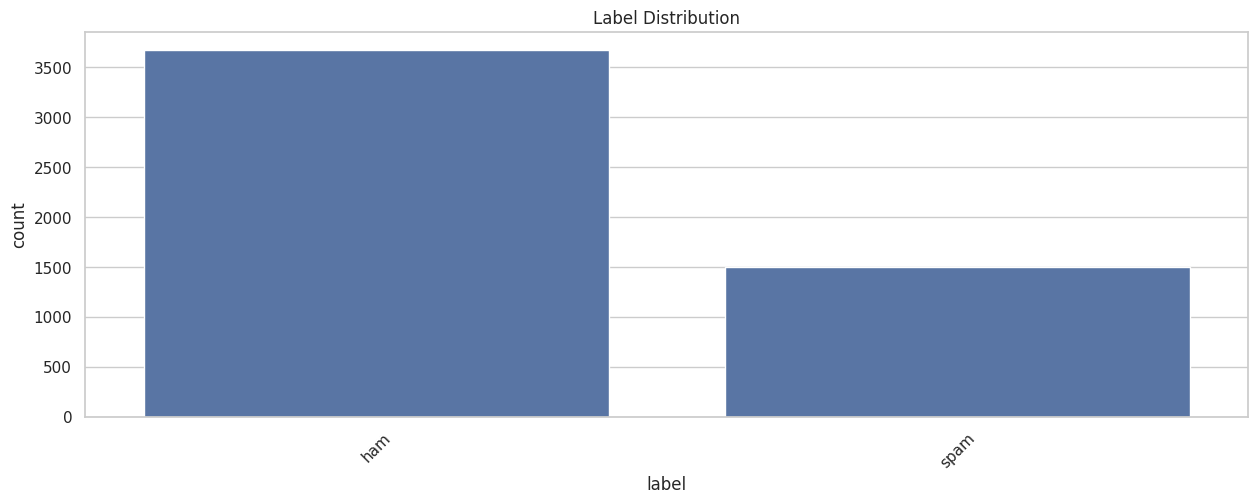

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df[["label","label_num"]].groupby(["label"], as_index = False).mean().sort_values(by="label_num",ascending = False)

,label,label_num
1,spam,1.0
0,ham,0.0


In [ ]:
df[["text","label_num"]].groupby(["text"], as_index = False).mean().sort_values(by="label_num",ascending = False)

,text,label_num
0,Subject: \r\n,1.0
4267,Subject: select eshopping for medicines and ta...,1.0
4242,Subject: satisfy her nj 2 w\r\nclick here to b...,1.0
4243,Subject: save 70 percent on super viagra 24663...,1.0
4244,Subject: save a bundle on meds !\r\nfont color...,1.0
...,...,...
2018,"Subject: hpl nom for march 1 , 2001\r\n( see a...",0.0
2019,"Subject: hpl nom for march 10 - 12 , 2001\r\n(...",0.0
2020,"Subject: hpl nom for march 13 , 2001\r\n( see ...",0.0
2021,"Subject: hpl nom for march 15 , 2001\r\n( see ...",0.0
